# TIMESERIES FORECASTING USING FBPROPHET

## Import Libraries

In [2]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet
import yfinance as yf
import numpy as np
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

# Import Data

In [7]:
data = yf.download("TATAMOTORS.NS", start="2010-01-01", end="2018-12-31",interval='1mo')

[*********************100%***********************]  1 of 1 completed


In [8]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-01,156.629990,167.147186,132.874786,137.396286,128.662720,308512479
2010-02-01,136.080399,146.429398,125.404907,140.730530,131.785019,296708433
2010-03-01,140.730530,164.179016,140.730530,149.931824,140.401428,544769911
2010-04-01,150.386948,173.835434,138.514297,172.667969,161.692352,512797698
2010-05-01,172.351364,174.666519,132.577972,149.397568,139.901138,564931097
...,...,...,...,...,...,...
2018-08-01,250.000000,274.700012,243.100006,267.500000,267.500000,308332043
2018-09-01,271.399994,282.000000,219.500000,223.699997,223.699997,255084345
2018-10-01,225.000000,232.800003,164.600006,179.100006,179.100006,434206704


In [9]:
TATA=data[['Close']]

In [10]:
TATA

,Close
Date,
2010-01-01,137.396286
2010-02-01,140.730530
2010-03-01,149.931824
2010-04-01,172.667969
2010-05-01,149.397568
...,...
2018-08-01,267.500000
2018-09-01,223.699997
2018-10-01,179.100006


In [11]:
TATA.index.names=['ds']

In [12]:
TATA.rename(columns={'Close':'y'},inplace=True)

In [14]:
TATA

,y
ds,
2010-01-01,137.396286
2010-02-01,140.730530
2010-03-01,149.931824
2010-04-01,172.667969
2010-05-01,149.397568
...,...
2018-08-01,267.500000
2018-09-01,223.699997
2018-10-01,179.100006


In [16]:
TATA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 108 entries, 2010-01-01 to 2018-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       108 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


In [17]:
TATA.index

DatetimeIndex(['2010-01-01', '2010-02-01', '2010-03-01', '2010-04-01',
               '2010-05-01', '2010-06-01', '2010-07-01', '2010-08-01',
               '2010-09-01', '2010-10-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', name='ds', length=108, freq=None)

In [18]:
TATA=TATA.reset_index()

<Axes: xlabel='ds'>

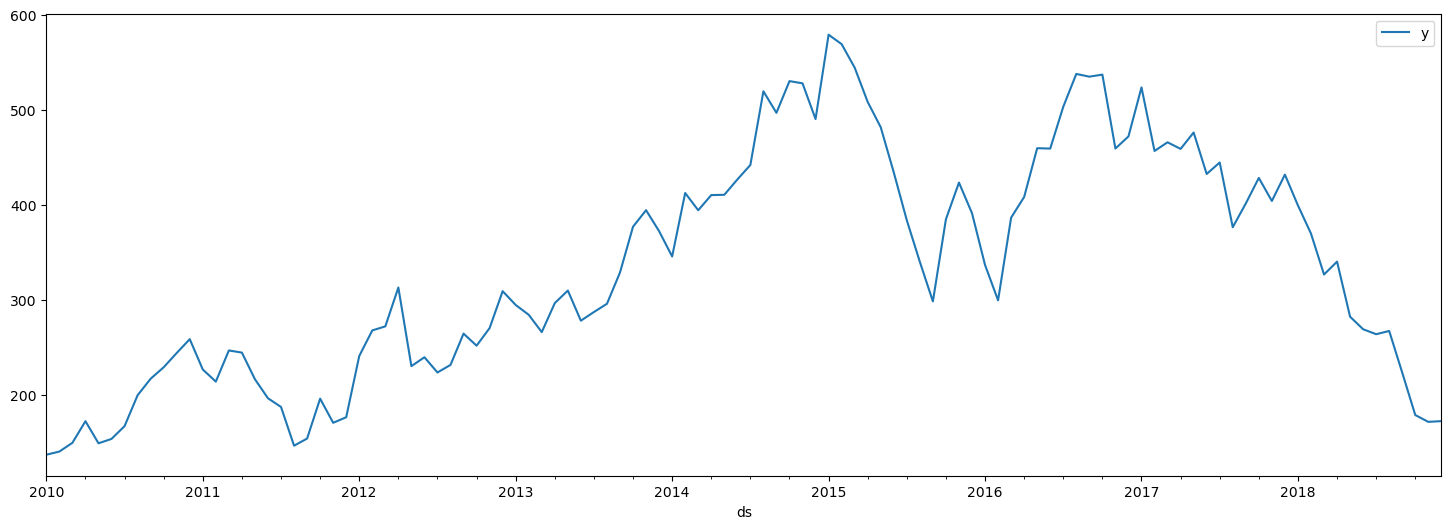

In [20]:
TATA.plot(x='ds',y='y',figsize=(18,6))

In [21]:
len(TATA)

108

# Split Train \ Test

In [24]:
train=TATA.iloc[:len(TATA)-48]
test=TATA.iloc[len(TATA)-48:]

# Model Building

In [37]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=48) #MS for monthly, H for hourly
forecast = m.predict(future)
     

17:12:13 - cmdstanpy - INFO - Chain [1] start processing
17:12:13 - cmdstanpy - INFO - Chain [1] done processing


# Forecasting 

In [38]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
103,2015-01-14,518.767070,561.750439,631.694307,518.595171,518.938105,77.634044,77.634044,77.634044,77.634044,77.634044,77.634044,0.0,0.0,0.0,596.401114
104,2015-01-15,519.100172,593.100134,664.849487,518.925892,519.279051,111.736485,111.736485,111.736485,111.736485,111.736485,111.736485,0.0,0.0,0.0,630.836657
105,2015-01-16,519.433275,625.380436,701.596331,519.260703,519.619765,144.864989,144.864989,144.864989,144.864989,144.864989,144.864989,0.0,0.0,0.0,664.298263
106,2015-01-17,519.766377,660.913334,734.304510,519.583863,519.956180,175.893808,175.893808,175.893808,175.893808,175.893808,175.893808,0.0,0.0,0.0,695.660186
107,2015-01-18,520.099480,685.626830,760.072166,519.901877,520.298781,203.767512,203.767512,203.767512,203.767512,203.767512,203.767512,0.0,0.0,0.0,723.866991


In [39]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
103,2015-01-14,596.401114,561.750439,631.694307
104,2015-01-15,630.836657,593.100134,664.849487
105,2015-01-16,664.298263,625.380436,701.596331
106,2015-01-17,695.660186,660.913334,734.304510
107,2015-01-18,723.866991,685.626830,760.072166


In [40]:
len(forecast)

108

In [41]:
plot_plotly(m ,forecast)

# Model Evaluation

In [22]:
from statsmodels.tools.eval_measures import rmse

In [23]:
predictions = forecast.iloc[-48:]['yhat']

In [24]:
print("Root Mean Squared Error between actual and  predicted values: ",rmse(predictions,test['y']))
print("Mean Value of Test Dataset:", test['y'].mean())

Root Mean Squared Error between actual and  predicted values:  467.0947674024764
Mean Value of Test Dataset: 402.11557992299396


# RMSE Normalization

In [29]:
rel.max()

ds    2018-12-01 00:00:00
y              578.940308
dtype: object

In [30]:
rel.min()

ds    2010-01-01 00:00:00
y              137.396286
dtype: object

In [31]:
rel.max()-rel.min()

ds    3256 days 00:00:00
y             441.544022
dtype: object

In [32]:
rmse=467/442

In [33]:
rmse

1.0565610859728507

In [42]:
round(1.0565610859728507, 1)

1.1